In [61]:
import pandas as pd
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
pn.extension('tabulator')

import hvplot.pandas

In [109]:
iob_df = pd.read_json("../tconnect-data/iobEvents.json")
basal_df = pd.read_json("../tconnect-data/basalEvents.json")
cgm_df = pd.read_json("../tconnect-data/cgmData.json")


iob_df['time'] = pd.to_datetime(iob_df['time'])
basal_df['time'] = pd.to_datetime(basal_df['time'])
cgm_df['EventDateTime'] = pd.to_datetime(cgm_df['EventDateTime'])

In [103]:
""" Event IDs
    81 = Current IOB
    9  = ?
    16 = ?
    64 = ?
    55 = ?
    20 = Bolus Request
"""
# Select Bolus events only
iob_df = iob_df[iob_df['event_id'] == 81]

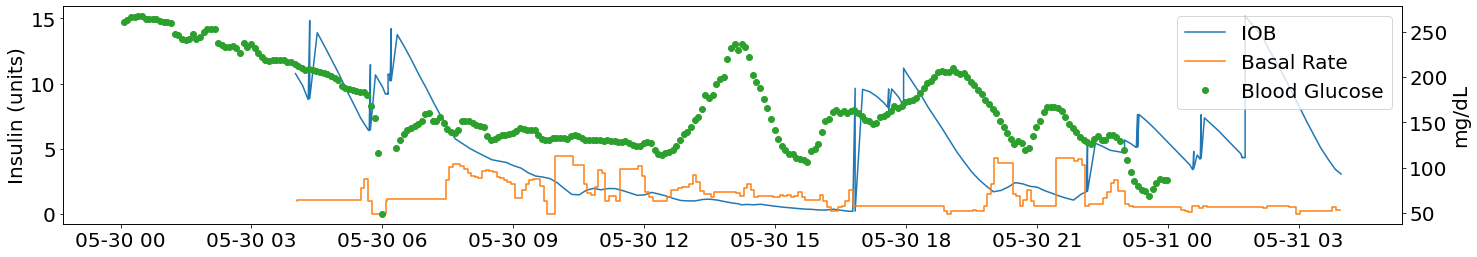

In [162]:
# Designate a figure size and font size
plt.rcParams.update({'font.size': 20})

# Date Filter
start = '2022-05-30'
end = '2022-05-31'

# Plot
iob_data = iob_df[iob_df['time'].between(start, end)]
basal_data = basal_df[basal_df['time'].between(start, end)]
cgm_data = cgm_df[cgm_df['EventDateTime'].between(start, end)]


fig, ax1 = plt.subplots(figsize=(24,4))

ax1.set_ylabel('Insulin (units)')
line1 = ax1.plot(iob_data['time'], iob_data['iob'], label="IOB")
line2 = ax1.step(basal_data['time'], basal_data['basal_rate'], label='Basal Rate')

ax2 = ax1.twinx()
ax2.set_ylabel('mg/dL')
line3 = ax2.plot(cgm_data['EventDateTime'], cgm_data['Readings (CGM / BGM)'], 'o', color='C2', label='Blood Glucose')

lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
plt.show()

0       155
1       153
2       149
3       150
4       149
       ... 
1646    146
1647    153
1648    155
1649    157
1650    160
Name: Readings (CGM / BGM), Length: 1651, dtype: int64